In [1]:
DIR_PATH = '../../Data/'
FILE_NAME = DIR_PATH +'fire_allyear.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import font_manager as fm, rc

font_path='../../Font/malgun.ttf'
font_name=fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

projectDF = pd.read_csv(FILE_NAME, encoding='CP949')

In [3]:
projectDF = projectDF.iloc[:,1:]
projectDF

,년,월,시간대,시도,화재유형,발화열원대분류,발화요인대분류,최초착화물대분류,장소대분류,사망,부상,인명피해(명)소계,재산피해소계
0,2015,1,심야,경상남도,"건축,구조물",작동기기,전기적 요인,"전기,전자",주거,0,0,0,2920
1,2015,1,심야,서울특별시,임야,"담뱃불, 라이터불",부주의,기타,임야,0,0,0,0
2,2015,1,심야,서울특별시,"자동차,철도차량","담뱃불, 라이터불",부주의,"침구,직물류","자동차,철도차량",0,0,0,137
3,2015,1,심야,서울특별시,"건축,구조물","담뱃불, 라이터불",부주의,"종이,목재,건초등","판매,업무시설",0,0,0,326
4,2015,1,심야,부산광역시,"건축,구조물",작동기기,부주의,식품,주거,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
214462,2019,12,저녁,경기도,"건축,구조물",작동기기,전기적 요인,"전기,전자",산업시설,0,0,0,23707
214463,2019,12,저녁,경상북도,"건축,구조물",미상,미상,"종이,목재,건초등",산업시설,0,0,0,3542
214464,2019,12,저녁,부산광역시,"건축,구조물",작동기기,부주의,식품,"판매,업무시설",0,0,0,0
214465,2019,12,저녁,제주특별자치도,"건축,구조물",작동기기,부주의,합성수지,"판매,업무시설",0,0,0,105


In [4]:
project15DF=projectDF[projectDF['년']==2015]  # 2015년 데이터 뽑아오기

In [5]:
project15DF.info() # 15년도 정보

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44435 entries, 0 to 44434
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   년          44435 non-null  int64 
 1   월          44435 non-null  int64 
 2   시간대        44435 non-null  object
 3   시도         44435 non-null  object
 4   화재유형       44435 non-null  object
 5   발화열원대분류    44435 non-null  object
 6   발화요인대분류    44435 non-null  object
 7   최초착화물대분류   44435 non-null  object
 8   장소대분류      44435 non-null  object
 9   사망         44435 non-null  int64 
 10  부상         44435 non-null  int64 
 11  인명피해(명)소계  44435 non-null  int64 
 12  재산피해소계     44435 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 4.7+ MB


In [20]:
allmon_graph

월
1     3678
2     3792
3     6549
4     3544
5     4206
6     3677
7     2876
8     3104
9     3352
10    3484
11    2773
12    3400
Name: 년, dtype: int64

In [ ]:
allmon_graph.mean() # 전체 월별 화재건수 평균 3702 

Text(0.5, 1.0, '2015년 월별 화재건수')

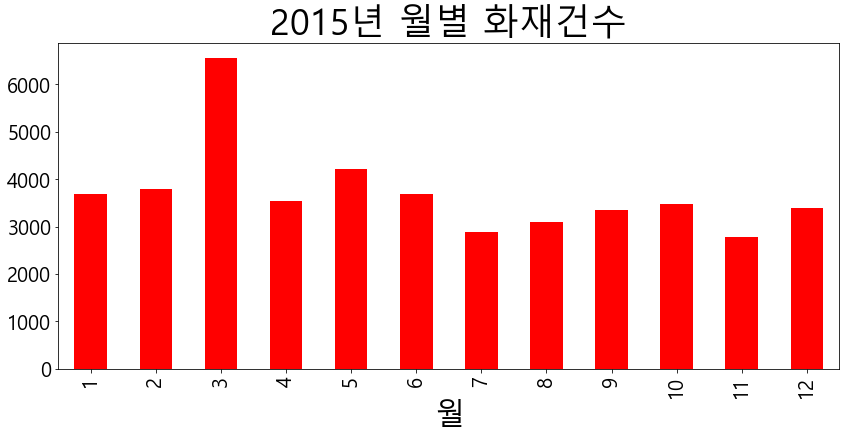

In [31]:
allmon_graph = project15DF.groupby('월').count()['년'] # 월 평균 발생건이 3702건인데 2~5월 까지 평균 이상으로 발생
plt.figure(figsize=(14,6))                             # 특히 3월에 최다발생 ---- 건조한 날씨
allmon_graph.plot(kind='bar', color='Red')
plt.rc()
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.title('2015년 월별 화재건수')

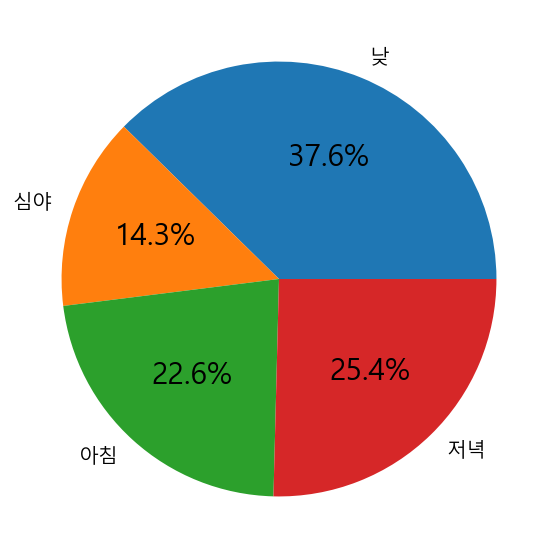

In [21]:
timePart_graph = project15DF.groupby('시간대').count()['년']

plt.figure(figsize=(10,10))
plt.rc('font', size=30)
plt.pie(timePart_graph, labels=timePart_graph.index, autopct='%.1f%%')
plt.show()

In [ ]:
graph_1= project15DF.groupby('시도').count()['년'] # 각 지역별 화재 발생건수(시도별 그룹화 후 그래프로 표현)

plt.figure(figsize=(10,6))
graph_1.plot(kind='bar', color='Red')
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=20, color = 'Blue')               
plt.title('2015년 지역별 화재건수')

In [7]:
bb = project15DF.groupby('시도').sum()['재산피해소계'].sort_values(ascending=False) # 지역별 재산피해소계
pd.DataFrame(project15DF.groupby('시도').sum()['재산피해소계'].sort_values(ascending=False))

,재산피해소계
시도,
경기도,240379978
경상남도,29979992
전라남도,19520216
부산광역시,17741193
경상북도,17666841
충청남도,17281575
인천광역시,16306026
강원도,14723530
서울특별시,14337272


In [8]:
project15DF.groupby('시도').sum()['인명피해(명)소계'].sort_values(ascending=False) # 지역별 인명피해
pd.DataFrame(project15DF.groupby('시도').sum()['인명피해(명)소계'].sort_values(ascending=False))

,인명피해(명)소계
시도,
경기도,673
서울특별시,249
경상남도,158
경상북도,131
강원도,120
전라남도,115
인천광역시,105
부산광역시,101
대구광역시,82


In [9]:
gg15DF = project15DF[project15DF['시도']=='경기도']       # 경기도 데이터 추출
gg15DF

,년,월,시간대,시도,화재유형,발화열원대분류,발화요인대분류,최초착화물대분류,장소대분류,사망,부상,인명피해(명)소계,재산피해소계
6,2015,1,심야,경기도,"건축,구조물","담뱃불, 라이터불",부주의,"종이,목재,건초등",생활서비스,0,0,0,33
11,2015,1,심야,경기도,"건축,구조물","담뱃불, 라이터불",부주의,쓰레기류,주거,0,0,0,61
13,2015,1,심야,경기도,"건축,구조물",작동기기,전기적 요인,"전기,전자",주거,0,0,0,815
14,2015,1,심야,경기도,"건축,구조물",미상(발화원인),미상,미상,산업시설,0,0,0,53901
16,2015,1,심야,경기도,기타(쓰레기 화재등),"담뱃불, 라이터불",부주의,"종이,목재,건초등",기타,0,0,0,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44406,2015,12,저녁,경기도,기타(쓰레기 화재등),"담뱃불, 라이터불",부주의,"종이,목재,건초등",기타,0,0,0,0
44411,2015,12,저녁,경기도,"건축,구조물",작동기기,전기적 요인,"전기,전자",기타서비스,0,0,0,249
44415,2015,12,저녁,경기도,"건축,구조물",작동기기,부주의,식품,주거,0,0,0,37
44422,2015,12,저녁,경기도,기타(쓰레기 화재등),작동기기,전기적 요인,"전기,전자",기타,0,0,0,231


In [10]:
gg15DF.groupby(['발화열원대분류']).count()['년']
pd.DataFrame(gg15DF.groupby(['발화열원대분류']).count()['년'].sort_values(ascending=False)) #발화열원 대분류

,년
발화열원대분류,
작동기기,3707
"담뱃불, 라이터불",2305
"불꽃, 불티",1880
미상(발화원인),1000
"마찰, 전도, 복사",809
기타(발화원인),429
화학적 발화열,107
자연적 발화열,92
"폭발물, 폭죽",4


In [11]:
gg15DF.groupby(['발화요인대분류']).count()['년']
pd.DataFrame(gg15DF.groupby(['발화요인대분류']).count()['년'].sort_values(ascending=False)) # 발화요인 대분류

,년
발화요인대분류,
부주의,4957
전기적 요인,2263
기계적 요인,1315
미상,850
기타,263
방화의심,171
화학적 요인,149
교통사고,121
자연적인 요인,113


In [12]:
groupSum = gg15DF.groupby(['장소대분류','재산피해소계']).count() # 장소, 재산피해 인덱스를 컬럼으로 리셋
groupSum.reset_index(inplace=True)                               
groupSum

,장소대분류,재산피해소계,년,월,시간대,시도,화재유형,발화열원대분류,발화요인대분류,최초착화물대분류,사망,부상,인명피해(명)소계
0,교육시설,24,1,1,1,1,1,1,1,1,1,1,1
1,교육시설,26,1,1,1,1,1,1,1,1,1,1,1
2,교육시설,44,1,1,1,1,1,1,1,1,1,1,1
3,교육시설,78,1,1,1,1,1,1,1,1,1,1,1
4,교육시설,91,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6396,"판매,업무시설",306722,1,1,1,1,1,1,1,1,1,1,1
6397,"판매,업무시설",446638,1,1,1,1,1,1,1,1,1,1,1
6398,"판매,업무시설",481427,1,1,1,1,1,1,1,1,1,1,1
6399,"판매,업무시설",717900,1,1,1,1,1,1,1,1,1,1,1


In [13]:
groupSum['장소별 재산피해'] = groupSum['재산피해소계']*groupSum['년'] 
groupSum

,장소대분류,재산피해소계,년,월,시간대,시도,화재유형,발화열원대분류,발화요인대분류,최초착화물대분류,사망,부상,인명피해(명)소계,장소별 재산피해
0,교육시설,24,1,1,1,1,1,1,1,1,1,1,1,24
1,교육시설,26,1,1,1,1,1,1,1,1,1,1,1,26
2,교육시설,44,1,1,1,1,1,1,1,1,1,1,1,44
3,교육시설,78,1,1,1,1,1,1,1,1,1,1,1,78
4,교육시설,91,1,1,1,1,1,1,1,1,1,1,1,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6396,"판매,업무시설",306722,1,1,1,1,1,1,1,1,1,1,1,306722
6397,"판매,업무시설",446638,1,1,1,1,1,1,1,1,1,1,1,446638
6398,"판매,업무시설",481427,1,1,1,1,1,1,1,1,1,1,1,481427
6399,"판매,업무시설",717900,1,1,1,1,1,1,1,1,1,1,1,717900


In [14]:
a = groupSum.groupby('장소대분류')['장소별 재산피해'].sum()                     #장소별 재산피해, 화재발생건수, 건당피해금액
#pd.DataFrame(groupSum.groupby('장소대분류')['장소별 재산피해'].sum())
b = groupSum.groupby('장소대분류')['년'].sum()
portion = a.div(b)

pd.concat([a,b,portion], axis=1).sort_values('년').rename(columns = {0:'건당피해', '년': '건수'}).sort_values('건당피해').


SyntaxError: invalid syntax (3367681115.py, line 6)

In [15]:
# 장소별 재산피해 건수 건당피해 

In [16]:
groupSum2 = gg15DF.groupby(['장소대분류','인명피해(명)소계']).count()
groupSum2.reset_index(inplace=True)

In [17]:
groupSum2['장소별 인명피해'] = groupSum2['인명피해(명)소계']*groupSum['년'] 
groupSum2

,장소대분류,인명피해(명)소계,년,월,시간대,시도,화재유형,발화열원대분류,발화요인대분류,최초착화물대분류,사망,부상,재산피해소계,장소별 인명피해
0,교육시설,0,49,49,49,49,49,49,49,49,49,49,49,0.0
1,교육시설,1,3,3,3,3,3,3,3,3,3,3,3,1.0
2,교육시설,2,2,2,2,2,2,2,2,2,2,2,2,2.0
3,기타,0,2513,2513,2513,2513,2513,2513,2513,2513,2513,2513,2513,0.0
4,기타,1,33,33,33,33,33,33,33,33,33,33,33,1.0
5,기타,2,6,6,6,6,6,6,6,6,6,6,6,2.0
6,기타서비스,0,400,400,400,400,400,400,400,400,400,400,400,0.0
7,기타서비스,1,11,11,11,11,11,11,11,11,11,11,11,1.0
8,산업시설,0,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564,0.0
9,산업시설,1,49,49,49,49,49,49,49,49,49,49,49,1.0


In [18]:
a1 = groupSum2.groupby('장소대분류')['인명피해(명)소계'].sum()
b1 = groupSum.groupby('장소대분류')['년'].sum()
portion1 = a1.div(b1)
pd.concat([a1,b1,portion1], axis=1).sort_values('년').rename(columns = {0:'건당피해', '년': '건수'}).sort_values('건당피해')

,인명피해(명)소계,건수,건당피해
장소대분류,,,
기타,3,2552,0.001176
임야,1,843,0.001186
"자동차,철도차량",3,1254,0.002392
기타서비스,1,411,0.002433
산업시설,10,1629,0.006139
운수자동차시설,2,64,0.031250
생활서비스,24,751,0.031957
집합시설,3,85,0.035294
"판매,업무시설",23,507,0.045365
